# Author:
- Huu Khang Nguyen - 7402909
- hkn878@uowmail.edu.au

# Environment:
- Python 3.10.8
- Ubuntu 22.04.2 LTS x86_64

# Task
- Predict critical temperature in the superconductivity data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.options.display.max_rows = 300

# Discover and visualise the data

In [2]:
df = pd.read_csv('./data/train.csv')
df.shape

(21263, 82)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [4]:
df.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass   
count        21263.000000      21263.000000          21263.000000  \
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass   
count       21263.000000           21263.000000         21263.000000  \
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass   
count             21263.000000       21263.000000           21263.000000  \
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence   
count     21263.000000  ...      21263.000000   21263.000000  \
mean         44.391893  ...          3.153127       3.056536   
std          20.035430  ...          1.191249       1.046257   
min           0.000000  ...          1.000000       1.000000   
25%          32.890369  ...          2.116732       2.279705   
50%          45.123500  ...          2.618182       2.615321   
75%          59.322812  ...          4.026201       3.727919   
max         101.019700  ...          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence   
count       21263.000000     21263.000000         21263.000000   21263.000000  \
mean            3.055885         1.295682             1.052841       2.041010   
std             1.174815         0.393155             0.380291       1.242345   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.091251         1.060857             0.775678       1.000000   
50%             2.434057         1.368922             1.166532       2.000000   
75%             3.914868         1.589027             1.330801       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  critical_temp  
count       21263.000000  21263.000000     21263.000000   21263.000000  
mean            1.483007      0.839342         0.673987      34.421219  
std             0.978176      0.484676         0.455580      34.254362  
min             0.000000      0.000000         0.000000       0.000210  
25%             0.921454      0.451754         0.306892       5.365000  
50%             1.063077      0.800000         0.500000      20.000000  
75%             1.918400      1.200000         1.020436      63.000000  
max             6.992200      3.000000         3.000000     185.000000  

[8 rows x 82 columns]

In [5]:
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass   
0                   4         88.944468             57.862692  \
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass   
0          66.361592              36.116612             1.181795  \
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass   
0                 1.062396          122.90607              31.794921  \
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence   
0        51.968828  ...          2.257143       2.213364           2.219783  \
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence   
0         1.368922             1.066221              1           1.085714  \
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

# Initial Visualisation

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

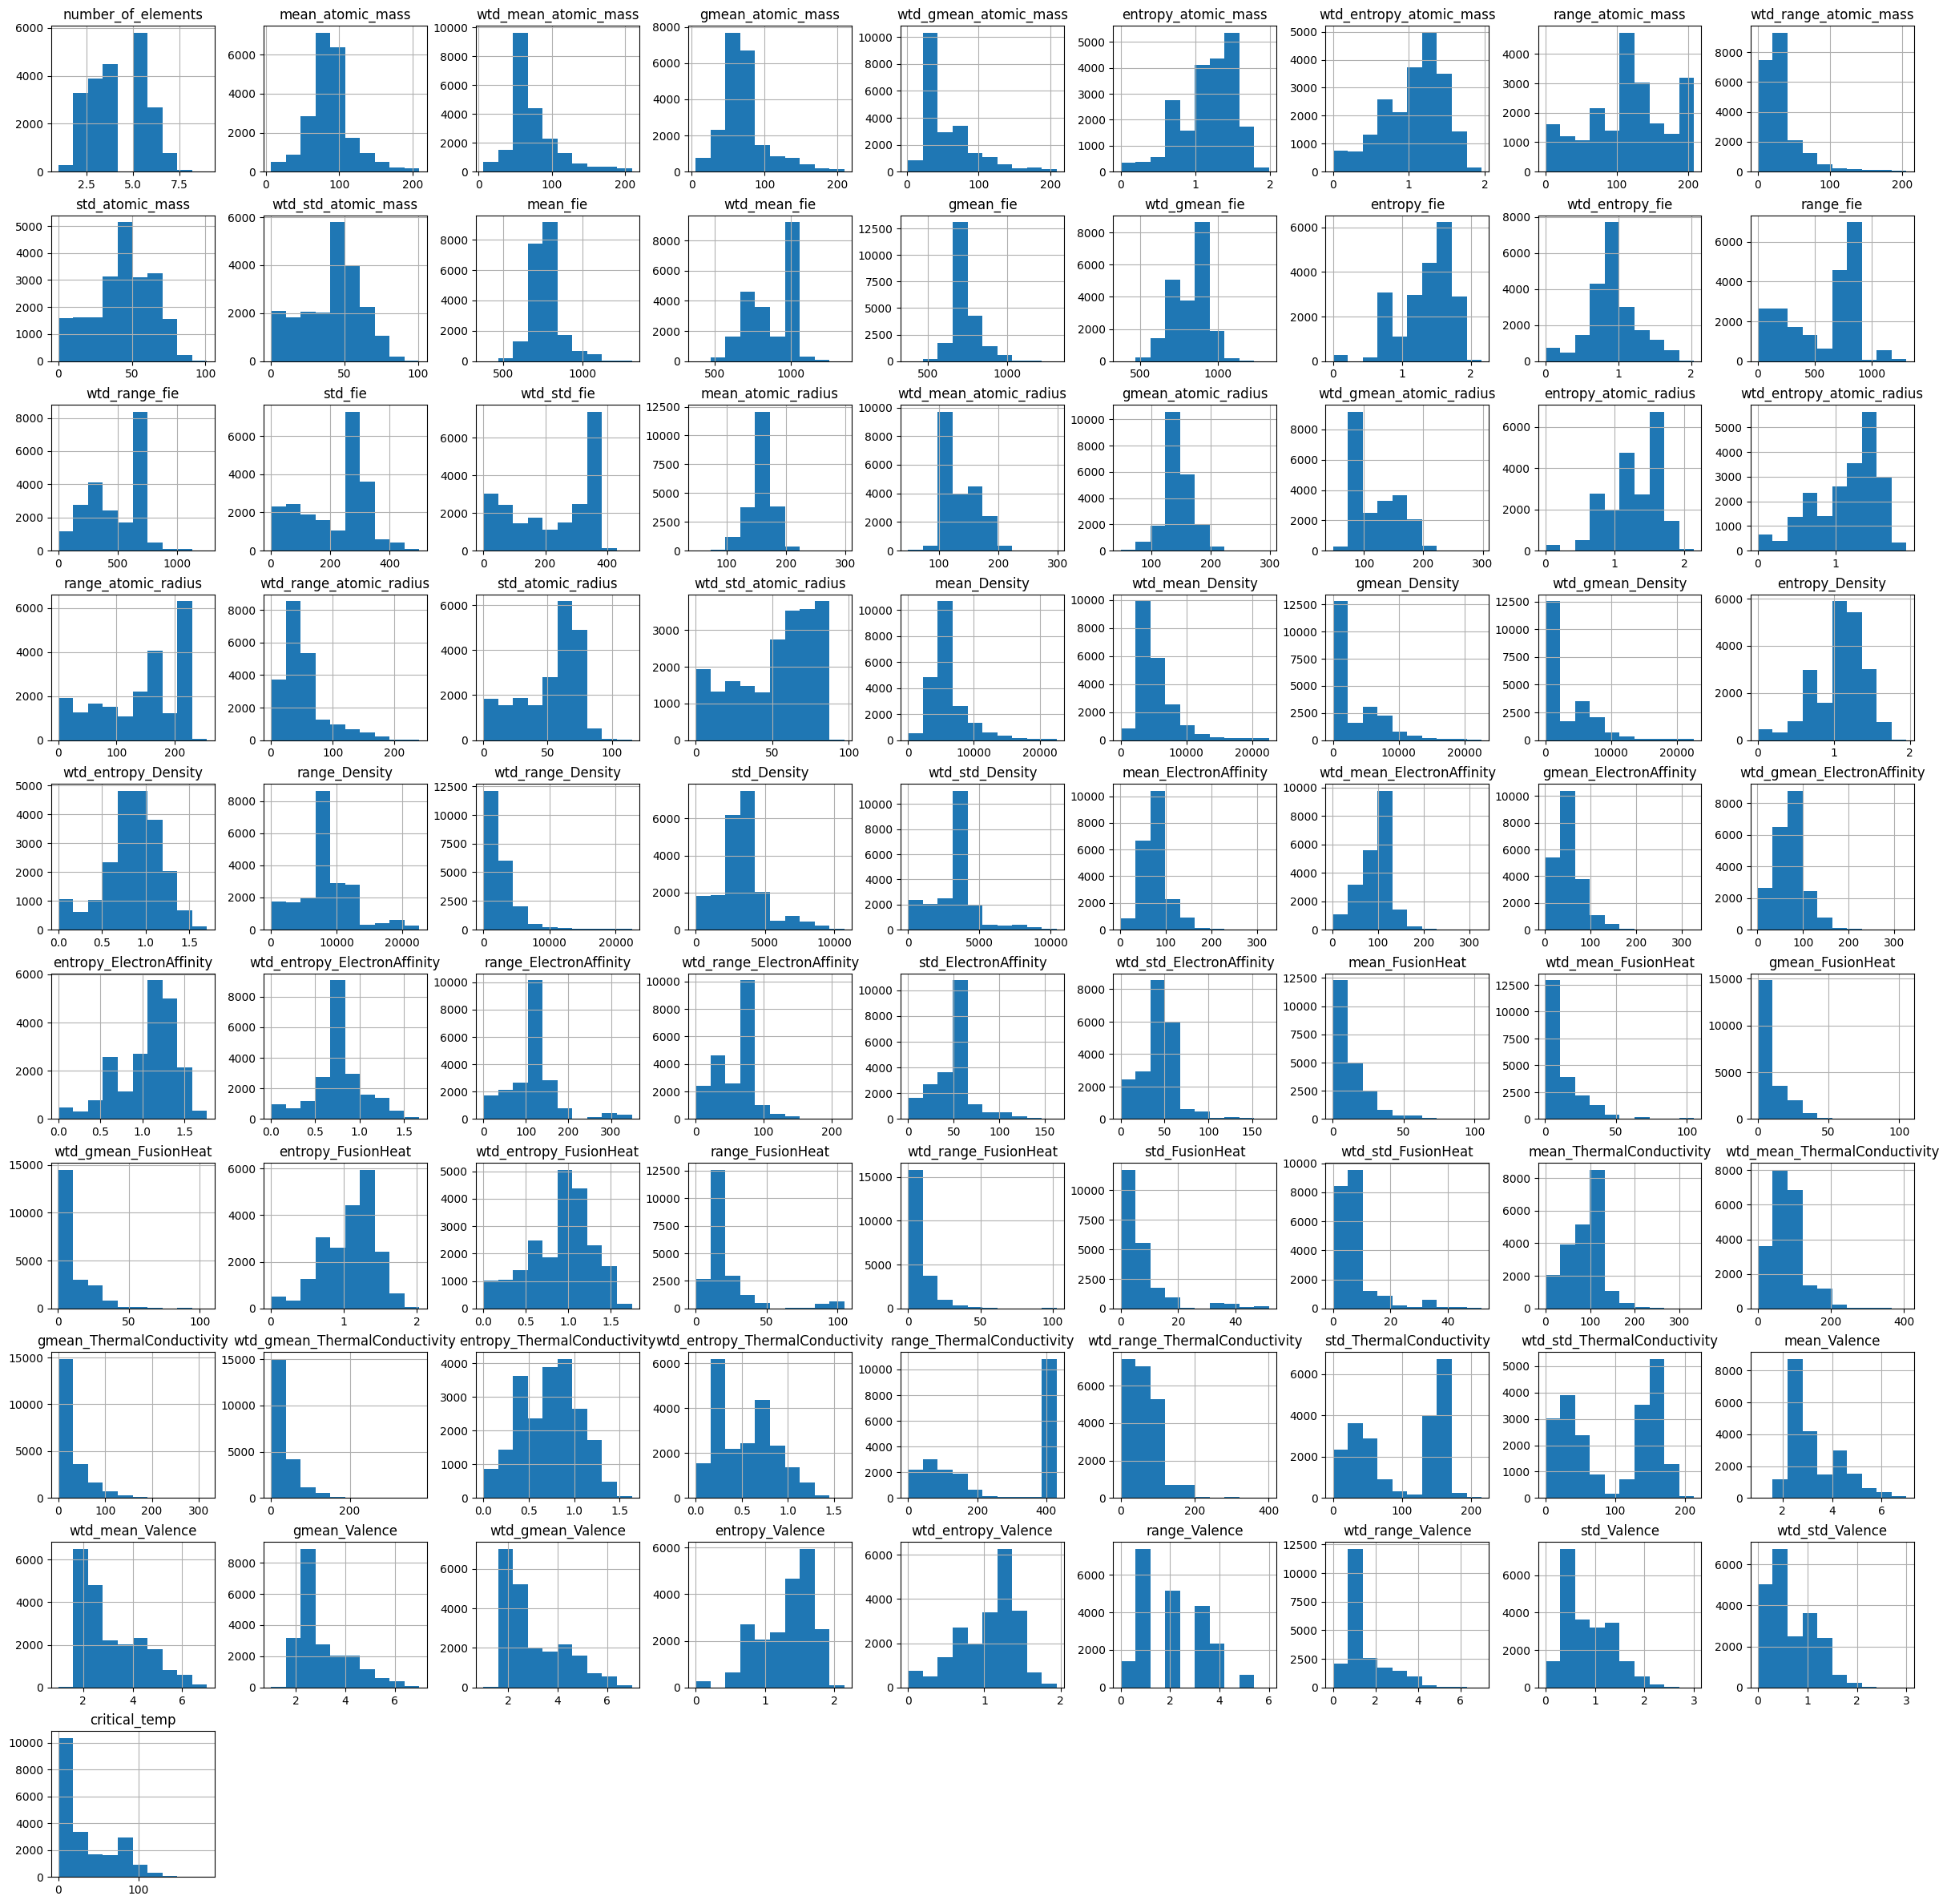

In [7]:
df.hist(figsize=(30,30))
plt.show()

## Explore the `critical_temp` column

<Axes: xlabel='critical_temp'>

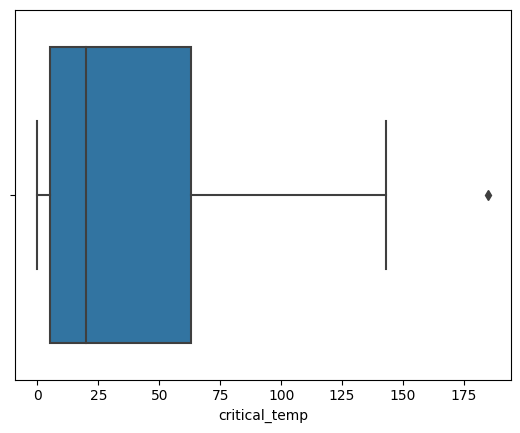

In [8]:
sns.boxplot(data = df['critical_temp'],x=df['critical_temp'])

Overall, it seems that the marjority of `critical_temp` value is distributed at around 10 to 65 range. The data also have very minimal number of outlier

## Dataset Correlation Heatmap 

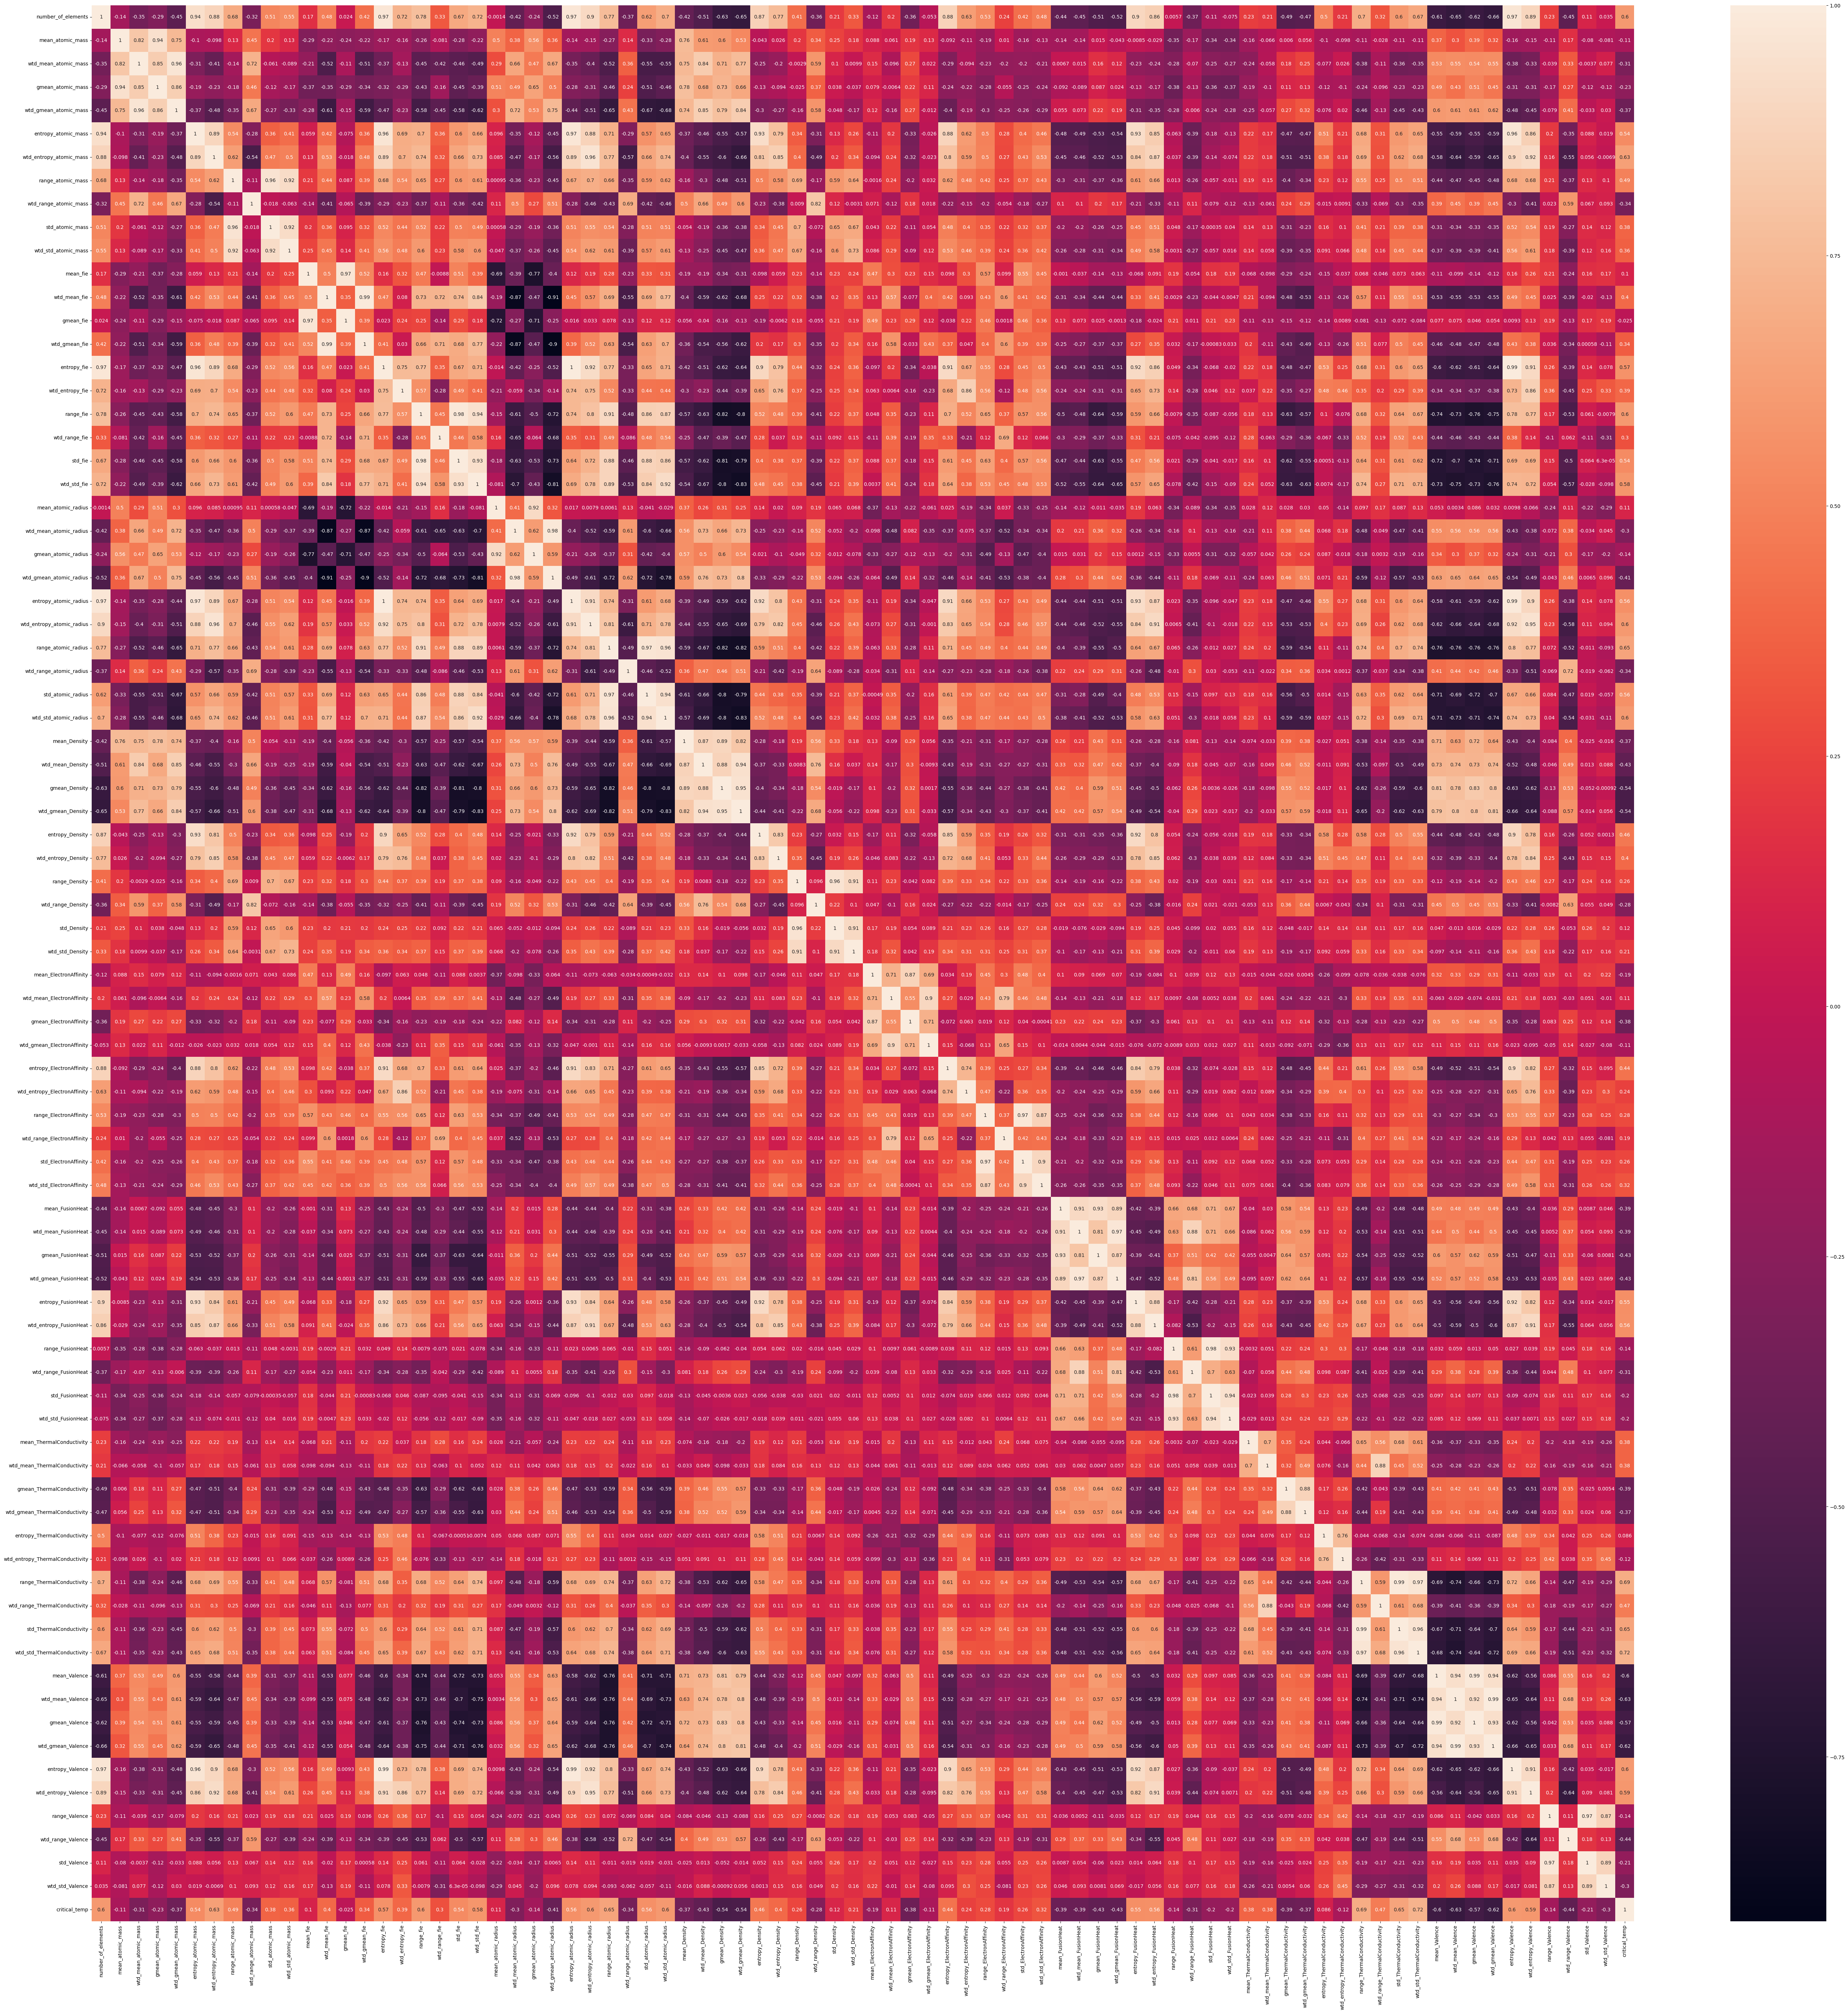

In [9]:
plt.figure(figsize = (70, 70))
sns.heatmap(df.corr(), annot= True)
plt.show()

# Prepare the data for machine learning algorithm

## Drop duplicates rows in the dataframe

In [10]:
df.drop_duplicates()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass   
0                       4         88.944468             57.862692  \
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass   
0              66.361592              36.116612             1.181795  \
1              73.132787              36.396602             1.449309   
2              66.361592              36.122509             1.181795   
3              66.361592              36.119560             1.181795   
4              66.361592              36.110716             1.181795   
...                  ...                    ...                  ...   
21258          82.515384              43.135565             1.177145   
21259          64.812662              32.867748             1.323287   
21260          99.433882              95.464320             0.690847   
21261          99.433882              96.901083             0.690847   
21262          82.555758              80.458722             1.041270   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass   
0                     1.062396          122.90607              31.794921  \
1                     1.057755          122.90607              36.161939   
2                     0.975980          122.90607              35.741099   
3                     1.022291          122.90607              33.768010   
4                     1.129224          122.90607              27.848743   
...                        ...                ...                    ...   
21258                 1.254119          146.88130              15.504479   
21259                 1.571630          188.38390               7.353333   
21260                 0.530198           13.51362              53.041104   
21261                 0.640883           13.51362              31.115202   
21262                 0.895229           71.75500              43.144000   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence   
0            51.968828  ...          2.257143       2.213364  \
1            47.094633  ...          2.257143       1.888175   
2            51.968828  ...          2.271429       2.213364   
3            51.968828  ...          2.264286       2.213364   
4            51.968828  ...          2.242857       2.213364   
...                ...  ...               ...            ...   
21258        65.764081  ...          3.555556       3.223710   
21259        69.232655  ...          2.047619       2.168944   
21260         6.756810  ...          4.800000       4.472136   
21261         6.756810  ...          4.690000       4.472136   
21262        29.905282  ...          4.500000       4.762203   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence   
0               2.219783         1.368922             1.066221              1  \
1               2.210679         1.557113             1.047221              2   
2               2.232679         1.368922             1.029175              1   
3               2.226222         1.368922             1.048834              1   
4               2.206963         1.368922             1.096052              1   
...                  ...              ...                  ...            ...   
21258           3.519911         1.377820             0.913658  

## Remove rows that has NA

In [11]:
df.dropna()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass   
0                       4         88.944468             57.862692  \
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass   
0              66.361592              36.116612             1.181795  \
1              73.132787              36.396602             1.449309   
2              66.361592              36.122509             1.181795   
3              66.361592              36.119560             1.181795   
4              66.361592              36.110716             1.181795   
...                  ...                    ...                  ...   
21258          82.515384              43.135565             1.177145   
21259          64.812662              32.867748             1.323287   
21260          99.433882              95.464320             0.690847   
21261          99.433882              96.901083             0.690847   
21262          82.555758              80.458722             1.041270   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass   
0                     1.062396          122.90607              31.794921  \
1                     1.057755          122.90607              36.161939   
2                     0.975980          122.90607              35.741099   
3                     1.022291          122.90607              33.768010   
4                     1.129224          122.90607              27.848743   
...                        ...                ...                    ...   
21258                 1.254119          146.88130              15.504479   
21259                 1.571630          188.38390               7.353333   
21260                 0.530198           13.51362              53.041104   
21261                 0.640883           13.51362              31.115202   
21262                 0.895229           71.75500              43.144000   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence   
0            51.968828  ...          2.257143       2.213364  \
1            47.094633  ...          2.257143       1.888175   
2            51.968828  ...          2.271429       2.213364   
3            51.968828  ...          2.264286       2.213364   
4            51.968828  ...          2.242857       2.213364   
...                ...  ...               ...            ...   
21258        65.764081  ...          3.555556       3.223710   
21259        69.232655  ...          2.047619       2.168944   
21260         6.756810  ...          4.800000       4.472136   
21261         6.756810  ...          4.690000       4.472136   
21262        29.905282  ...          4.500000       4.762203   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence   
0               2.219783         1.368922             1.066221              1  \
1               2.210679         1.557113             1.047221              2   
2               2.232679         1.368922             1.029175              1   
3               2.226222         1.368922             1.048834              1   
4               2.206963         1.368922             1.096052              1   
...                  ...              ...                  ...            ...   
21258           3.519911         1.377820             0.913658  

## Standardising the data

`StandardScaler()` is used here to rescaling the distrbution of values of each feature

In [12]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

for col in df.columns:
    scalerData = scaler.fit_transform(df[col].values.reshape(-1, 1))
    df[col] =  scalerData
print(df.shape)

(21263, 82)


In [13]:
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass   
0           -0.080058          0.046733             -0.451651  \
1            0.614744          0.174269             -0.432071   
2           -0.080058          0.046733             -0.450978   
3           -0.080058          0.046733             -0.451314   
4           -0.080058          0.046733             -0.452324   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass   
0          -0.158850              -0.611819             0.044358  \
1           0.059368              -0.604180             0.777430   
2          -0.158850              -0.611658             0.044358   
3          -0.158850              -0.611739             0.044358   
4          -0.158850              -0.611980             0.044358   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass   
0                -0.003707           0.133725              -0.053039  \
1                -0.015267           0.133725               0.108900   
2                -0.218984           0.133725               0.093294   
3                -0.103615           0.133725               0.020128   
4                 0.162775           0.133725              -0.199372   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence   
0         0.378186  ...         -0.752156      -0.805912          -0.711705  \
1         0.134901  ...         -0.752156      -1.116731          -0.719454   
2         0.378186  ...         -0.740164      -0.805912          -0.700728   
3         0.378186  ...         -0.746160      -0.805912          -0.706224   
4         0.378186  ...         -0.764149      -0.805912          -0.722618   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence   
0         0.186292             0.035183      -0.837959          -0.406166  \
1         0.664971            -0.014779      -0.033011          -0.362352   
2         0.186292            -0.062235      -0.837959          -0.376957   
3         0.186292            -0.010538      -0.837959          -0.391562   
4         0.186292             0.113627      -0.837959          -0.435376   

   std_Valence  wtd_std_Valence  critical_temp  
0    -0.838372        -0.520070      -0.158267  
1    -0.426866        -0.450821      -0.245849  
2    -0.838372        -0.503304      -0.450208  
3    -0.838372        -0.511524      -0.362626  
4    -0.838372        -0.538178      -0.333432  

[5 rows x 82 columns]

## Split the data for training and test (2/3 and 1/3 respectively )

Here, we will use stratified sampling method to sample the records. However as the target variable (`critical_temp`) is continuous, rather than categorical, we can divide the target variable into bins. After that each bin will be used for sampling

In [14]:
df['critical_temp_bins'] = pd.cut(df['critical_temp'], bins=3, labels=False)

In [15]:
y = df['critical_temp']
X = df.drop(['critical_temp'], axis=1)

In [16]:
df['critical_temp_bins'].value_counts()

critical_temp_bins
0    15852
1     5235
2      176
Name: count, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df['critical_temp_bins'])

In [18]:
X_train.drop(['critical_temp_bins'], axis=1)
X_test.drop(['critical_temp_bins'], axis=1)

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass   
17391           -0.774859         -0.400761             -0.288330  \
6018            -0.080058         -0.374483             -0.600973   
400             -0.080058         -0.372017             -0.488904   
2051             2.004346          0.636788              0.393486   
8565             1.309545         -0.112265             -0.469352   
...                   ...               ...                   ...   
3221             0.614744          0.627083             -0.455670   
8374             2.699147         -0.079781              0.450372   
2092             2.004346          0.386286             -0.337852   
7034             0.614744          0.824733             -0.110706   
19079           -1.469660         -0.420512              0.399887   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass   
17391          -0.268248              -0.127292            -0.657809  \
6018           -0.384600              -0.609298             0.092986   
400            -0.386101              -0.619495             0.086772   
2051            0.241187               0.245656             1.491114   
8565           -0.159452              -0.596312             1.185016   
...                  ...                    ...                  ...   
3221            0.300482              -0.590364             0.716053   
8374           -0.453624               0.288572             1.540821   
2092            0.046832              -0.501105             1.425475   
7034            0.380717              -0.507535             0.660847   
19079           0.065467               0.733890            -1.358551   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass   
17391                -0.036177          -0.169298              -0.673017  \
6018                  0.549809           0.104829              -0.677925   
400                  -0.090035           0.133725              -0.014810   
2051                  1.514964           1.416547              -0.283965   
8565                  0.874717           0.652777              -0.458023   
...                        ...                ...                    ...   
3221                  0.841746           0.758863              -0.484211   
8374                  1.226517           1.416547               0.004949   
2092                  1.762531           1.416547              -0.618624   
7034                  1.070400           1.332391              -0.651780   
19079                -1.827774          -1.525117               1.315498   

       std_atomic_mass  ...  mean_Valence  wtd_mean_Valence  gmean_Valence   
17391         0.032670  ...     -0.189767          0.039349      -0.327000  \
6018         -0.028377  ...     -0.907755         -0.900485      -0.805912   
400          -0.005113  ...     -0.907755         -0.752864      -0.805912   
2051          1.347729  ...     -0.053008         -0.506310      -0.179243   
8565          0.358327  ...     -0.827978         -0.891646      -0.733209   
...                ...  ...           ...               ...            ...   
3221          0.660091  ...     -0.572694         -0.896549      -0.540103   
8374          1.486457  ...     -0.788090         -0.566752      -0.955776   
2092          1.383907  ...     -0.326527         -0.663711      -0.372230   
7034          1.054530  ...     -0.764157         -0.818781      -0.673251   
19079        -1.409860  ...      0.767549          0.710929       0.901773   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence   
17391          -0.145120        -0.764743            -0.401243       0.771937  \
6018           -0.842339         0.186292             0.452579      -0.837959   
400            -0.712351         0.186292             0.059329      -0.837959   
2051           -0.579075         1.423620             1.955066       0.771937   
8565           -0.834815         1.211909             0.63

# Select and train model

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def evaluate_regression_performance(y_test, y_pred):
    score = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return {
        'r2_score': score,
        'mean_absolute_error': mae,
        'mean_squared_error': mse,
        'root_mean_squared_error': np.sqrt(mse),
    }

In [20]:
performance_dict = {
    'r2_score': [],
    'mean_absolute_error': [],
    'mean_squared_error': [],
    'root_mean_squared_error': [],
    'model': []
}

In [21]:
def add_perf_to_dict(model_perf, model_name: str):
    performance_dict['model'].append(model_name)
    for key in model_perf:
        performance_dict[key].append(model_perf[key])



## Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [23]:
linear_reg.score(X_test, y_test)

0.908489713152839

In [24]:
linear_reg_perf = evaluate_regression_performance(y_test, y_pred)
add_perf_to_dict(linear_reg_perf, 'linear_reg')

## Decision Tree Regressor Model

In [25]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [26]:
decision_tree.score(X_test, y_test)

0.9383790251147879

In [27]:
decision_tree_perf = evaluate_regression_performance(y_test, y_pred)
add_perf_to_dict(decision_tree_perf, 'decision_tree')

## Random Forest Regressor Model

In [28]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_jobs=-1)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [29]:
random_forest.score(X_test, y_test)

0.9611985411049015

In [30]:
random_forest_perf = evaluate_regression_performance(y_test, y_pred)
add_perf_to_dict(random_forest_perf, 'random_forest')

In [31]:
perf_df = pd.DataFrame(data=performance_dict)
perf_df

r2_score  mean_absolute_error  mean_squared_error  root_mean_squared_error   
0  0.908490             0.237494            0.092611                 0.304320  \
1  0.938379             0.142057            0.062362                 0.249724   
2  0.961199             0.120547            0.039268                 0.198162   

           model  
0     linear_reg  
1  decision_tree  
2  random_forest

Overall, random forest regressor seems to have the best performance out of the three models (highest `r2_score`, lowest `mean_absolute_error` and lowest `mean_square_error`) despite the longer training time than the others

# Fine-tune the models

Here I will use GridSearchCV to exhaustive search for the most optimal parameters for chosen classifiers

In [32]:
from sklearn.model_selection import GridSearchCV
param_list = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [3,5,10,15,20,100,None],
    'positive': [True, False]
}
linear_reg = LinearRegression()
tuned_linear_reg = GridSearchCV(linear_reg, param_list)
tuned_linear_reg.fit(X_train, y_train)
y_pred = tuned_linear_reg.predict(X_test)


In [33]:
tuned_linear_reg_perf = evaluate_regression_performance(y_test, y_pred)
add_perf_to_dict(tuned_linear_reg_perf, 'tuned_linear_reg')

In [34]:
tuned_linear_reg_perf

{'r2_score': 0.908489713152839,
 'mean_absolute_error': 0.23749438287946834,
 'mean_squared_error': 0.09261058011515644,
 'root_mean_squared_error': 0.3043198648053663}

In [35]:
from sklearn.model_selection import GridSearchCV
param_list = {
    'min_samples_split':[2,3,6,9,12],
    'max_depth': [5,10,15, None], 
    'criterion' : ['squared_error', 'absolute_error', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2', 1],
    'random_state': [42]
}
decision_tree = DecisionTreeRegressor()
tuned_decision_tree = GridSearchCV(decision_tree,param_list, n_jobs=-1) # use all the cpu cores
tuned_decision_tree.fit(X_train, y_train)
y_pred = tuned_decision_tree.predict(X_test)

In [36]:
tuned_decision_tree_perf = evaluate_regression_performance(y_test, y_pred)
add_perf_to_dict(tuned_decision_tree_perf, 'tuned_decision_tree')

In [37]:
tuned_decision_tree_perf

{'r2_score': 0.9398328408244274,
 'mean_absolute_error': 0.15056896256649643,
 'mean_squared_error': 0.060890591725902804,
 'root_mean_squared_error': 0.24676019072350955}

In [42]:
from sklearn.model_selection import GridSearchCV
param_list = {
    'n_estimators':[100, 50, 20],
    'max_depth': [5,10,None], 
    'criterion' : ['squared_error', 'absolute_error'],
    'max_features': ['sqrt', 'log2', 1],
}
random_forest = RandomForestRegressor(random_state=42, n_jobs=-1) # Using all cpu core
tuned_random_forest = GridSearchCV(random_forest,param_list, n_jobs=-1, cv=3)
tuned_random_forest.fit(X_train, y_train)
y_pred = tuned_random_forest.predict(X_test)

In [43]:
tuned_random_forest_perf = evaluate_regression_performance(y_test, y_pred)
add_perf_to_dict(tuned_random_forest_perf, 'tuned_random_forest')

In [44]:
perf_df = pd.DataFrame(data=performance_dict)
perf_df

r2_score  mean_absolute_error  mean_squared_error  root_mean_squared_error   
0  0.908490             0.237494            0.092611                 0.304320  \
1  0.938379             0.142057            0.062362                 0.249724   
2  0.961199             0.120547            0.039268                 0.198162   
3  0.908490             0.237494            0.092611                 0.304320   
4  0.939833             0.150569            0.060891                 0.246760   
5  0.960603             0.121021            0.039870                 0.199675   

                 model  
0           linear_reg  
1        decision_tree  
2        random_forest  
3     tuned_linear_reg  
4  tuned_decision_tree  
5  tuned_random_forest

# Evaluate the outcomes

- In conclusion, random forest seems to be the best model among the three chosen models with default parameters

- Fine-tuning all the regression models with GridSearchCV to find the best parameters for models improves the decision tree model (minimal increase in `r2_score`, slightly lower the `mean_squared_error`, and slightly lower `rmse`). However, linear regression and random forest performance does not improve based on my experiment, this might be due to not enough parameters being passed in the `param_list`

- Running GridSearchCV takes a long time, especially with Random Forest where it takes > 2 hours to train despite not producing the result. I learnt that this can be improve by
    - Utilising `n_jobs` parameters to the model accross multiple CPU cores/threads improve the training time tremendously
    - Roughly estimate the time it takes by (taking the product of the parameters list) * (the number of fold cross validation (cv)) * (the time it takes to train a model with default parameter)
